### Title: 
Canadians at risk for Heart Disease 🤔 
#### Introduction:
Heart disease is one of the leading causes of death worldwide. Reliable predictors are required to diagnose an individual's risk before progression of the disease. An evidence based dataset was created using 76 predictors of heart disease, this database called “Heart Disease” was made public in 1988. Using this database, our team will answer the question: how likely will the average Canadian above the age of 60 develop heart disease?

#### Methods:
We will use classification and visualization methods from various packages such as the tidyverse. For this investigation, we will use variables such as resting blood pressure, serum cholesterol, fasting blood sugar, and maximum heart rate. We will compare these variables against known characteristics of the average Canadian with respect to the aforementioned variables to formulate a prediction on which percentage of Canadians above 60 are susceptible to heart disease. With these factors, we intend to investigate any accompanying trends within the dataset. 

#### Expected outcomes and significance:
Preceding further analysis based on the variables aforementioned in the methods: based on the average lifestyle and statistics of the Canadian population, we predict that the average Canadian above 60 is highly likely to develop heart disease. The use of this dataset in this way is crucial to aiding the public health epidemic of heart and obesity in Canada as it will help experts gauge the average >60 year old Canadians risk and be prepared for the proportion of patients requiring heart disease care. Further questions to be asked include what can we do to decrease the population's risk of developing heart disease?



#### Preliminary Exploratory Data Analysis

In [1]:
# libraries
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [2]:
# importing in data and adding column names
data <- read_csv("https://raw.githubusercontent.com/BeesKneezz/dsci_100_2023_group_7/main/data/processed.cleveland.data", col_names = FALSE)
colnames(data) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [3]:
# filtering / wrangling data
data_wrangled <- data |>
    select(age, chol, trestbps, fbs, thalach, num) |>
    filter(age > 60) |>
    mutate(num = as_factor(num))
levels(data_wrangled$num) <- c(levels(data_wrangled$num), 'Diagnosed', 'Not diagnosed')
data_wrangled$num[data_wrangled$num != '0'] <- 'Diagnosed'
data_wrangled$num[data_wrangled$num == '0'] <- 'Not diagnosed'
data_wrangled

age,chol,trestbps,fbs,thalach,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,233,145,1,150,Not diagnosed
67,286,160,0,108,Diagnosed
67,229,120,0,129,Diagnosed
⋮,⋮,⋮,⋮,⋮,⋮
63,187,140,0,144,Diagnosed
63,197,124,0,136,Diagnosed
68,193,144,1,141,Diagnosed


In [4]:
# splitting data sets
data_split <- initial_split(data_wrangled, prop = 0.75, strata = num)
data_train <- training(data_split)
data_test <- testing(data_split)

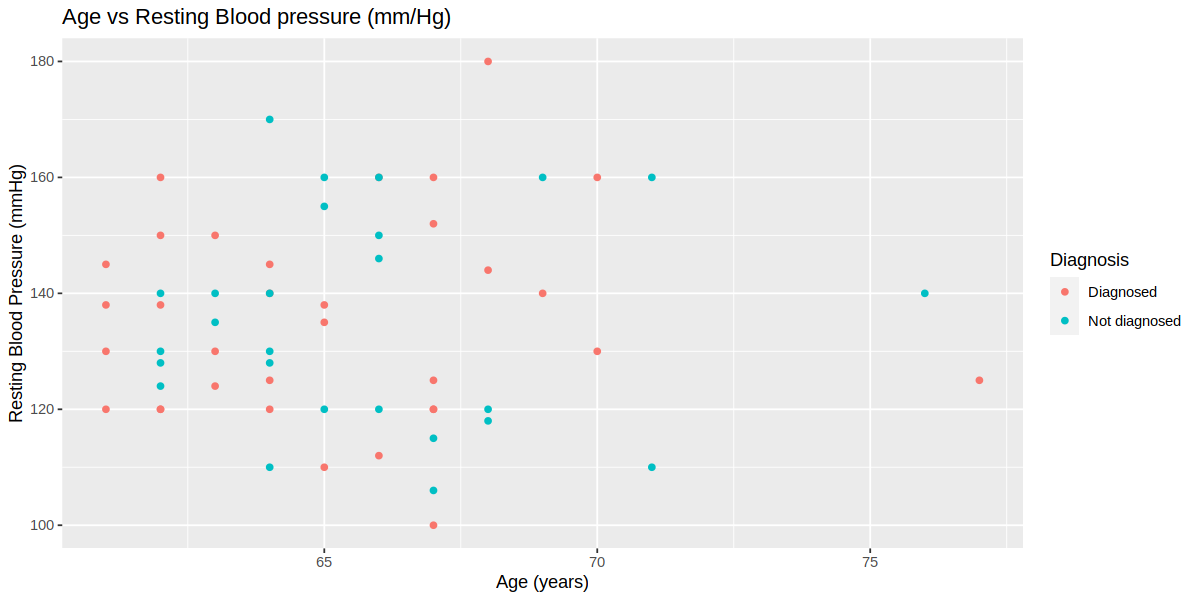

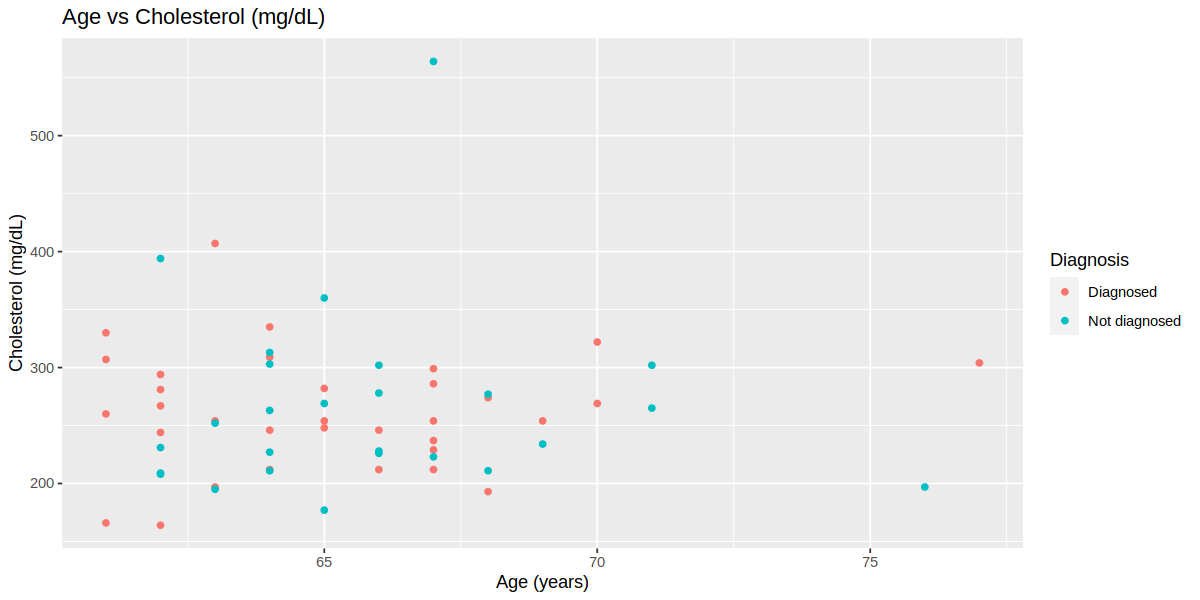

In [5]:
options(repr.plot.width = 10, repr.plot.height = 5)
#setting seed
set.seed(2020)
#First visual
visual <- data_train %>% 
    ggplot(aes(x=age,y=trestbps, colour = num)) +
        geom_point() +
        labs(x= "Age (years)", y = "Resting Blood Pressure (mmHg)", colour = "Diagnosis") +
        ggtitle("Age vs Resting Blood pressure (mm/Hg)")
                 
#Second visual
visual_2 <- data_train |>
    ggplot(aes(x=age,y=chol, colour = num)) +
        geom_point() +
        labs(x= "Age (years)", y = "Cholesterol (mg/dL)", colour = "Diagnosis") +
        ggtitle("Age vs Cholesterol (mg/dL)")

visual
visual_2